In [60]:
from __future__ import division, print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline

np.random.seed(2)

import numpy as np
import bm_classify as sol

/Users/huangwenhuang/miniconda3/envs/csci544/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


digit
9        500
8        500
7        500
6        500
5        500
4        500
3        500
2        500
1        500
0        500
dtype: int64

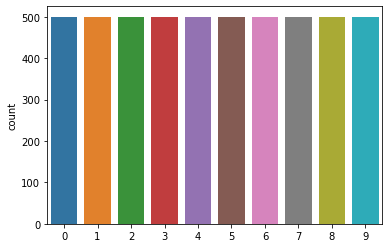

In [61]:
# load data, 0-9 digit images
dataset='mnist_subset.json'
with open(dataset, 'r') as f:
    data_set = json.load(f)
train_set, valid_set, test_set = data_set['train'], data_set['valid'], data_set['test']
X_train = pd.DataFrame(train_set[0])
Y_train = pd.DataFrame(train_set[1], columns=['digit'])
g = sns.countplot(train_set[1])
Y_train.value_counts()

In [62]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [63]:
X_train = X_train / 255.0
X_train = X_train.values.reshape(-1,28,28,1)


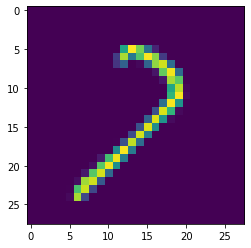

In [64]:
# show example image
g = plt.imshow(X_train[0][:,:,0])

In [65]:
def accuracy_score(true, preds):
    return np.sum(true == preds).astype(float) / len(true)

In [66]:
def run_multiclass():
    from data_loader import data_loader_mnist
    import time
    datasets = [(data_loader_mnist(), 'MNIST', 10)]

    for data, name, num_classes in datasets:
        print('%s: %d class classification' % (name, num_classes))
        X_train, X_test, y_train, y_test = data
        for gd_type in ["sgd", "gd"]:
            s = time.time()
            w, b = sol.multiclass_train(X_train, y_train, C=num_classes, gd_type=gd_type)
            print(gd_type + ' training time: %0.6f seconds' %(time.time()-s))
            train_preds = sol.multiclass_predict(X_train, w=w, b=b)
            preds = sol.multiclass_predict(X_test, w=w, b=b)
            print('train acc: %f, test acc: %f'
                % (accuracy_score(y_train, train_preds), accuracy_score(y_test, preds)))
        print()

In [67]:
run_multiclass()

MNIST: 10 class classification
sgd training time: 0.060494 seconds
train acc: 0.771800, test acc: 0.773000
gd training time: 14.033835 seconds
train acc: 0.945400, test acc: 0.896000

